# Modelado en Optimización (IIND-2501)

## Lección 3.1: Búsqueda del mínimo o máximo de una función

In [1]:
'''
Importaciones y configuraciones (NO modificar).
'''
from helpers_busqueda import init_busqueda, show_fig, plot_1d_paths, plot_convergence, plot_2d_contour, lift_1d
np, plt = init_busqueda()   # importa: numpy=np; matplotlib=plt

El primer problema de optimización que veremos es la minimización (o maximización) de una función (en general, no lineal) con variables continuas, sin considerar restricciones. Este es un caso **diferente al de los Módulos 1 y 2 del curso**, en los que sí considerábamos retricciones y las funciones objetivo eran lineales. Muchos problemas prácticos requieren encontrar el óptimo de una función no lineal, así que partiremos de este caso para luego incorporar casos con restricciones y con variables enteras o binarias.

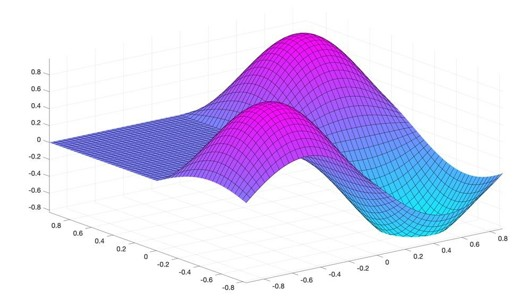

In [2]:
show_fig("fnolin.jpg")

Estudiaremos dos tipos de estrategias de solución, construyendo la búsqueda iterativa con base en la ecuación de actualización:

$$x_{t+1} = x_t + \alpha \Delta x$$

1. **Búsqueda local** (basada en vecindarios): en general es posible hacer búsquedas en cualquier tipo de vecindario. En esta lección, trabajaremos con un *vecindario circular*. Consideraremos $k$ posibles movimientos de longitud $d$ alrededor de un punto inicial $x_0$. Así, la *dirección y longitud* de los movimientos estarán dadas por $k$ radios de un círculo centrado en $x_0$.
2. **Descenso de gradiente**: partiendo de un punto inicial $x_0$ consideraremos movimientos cuya *dirección* está dada por el gradiente negativo de la función objetivo ($-\nabla f$) y la *longitud* puede obedecer a diferentes reglas (en esta lección, trabajaremos con una longitud fija).

In [3]:
# ------------------------- FUNCIONES PARA GENERAR VECINDARIOS  ---------------------------
def vecindario_circular(x0, d=.2, k=8):
    """
    Genera 'k' puntos vecinos distribuidos en un círculo
    de radio 'd' alrededor de 'x0'    
    Retorna: Lista de puntos vecinos
    """
    angulos = np.linspace(0, 2*np.pi, k, endpoint=False)
    vecinos = [x0 + d * np.array([np.cos(theta), np.sin(theta)]) for theta in angulos]
    return vecinos

def vecindario_lineal(x, d=0.5):
    '''
    Versión simplificada para ejemplo 1D: usa "vecinos" en una línea (no círculo).
    '''
    x = float(np.asarray(x).ravel()[0])
    return np.array([[x - d], [x + d]], dtype=float)

In [4]:
# ------------------------- ALGORITMOS CENTRALES DE LA LECCIÓN  ---------------------------
def busqueda_local(x0, f, generador_vecinos, iters=50):
    """
    Evalúa vecinos de x0 y elige movimiento que mejore f(x)
    hasta que no se halle mejora, o se alcanzan 'iters' iteraciones
    """
    x = x0.copy()       # trabaja sobre una copia para no afectar original
    hist = [x.copy()]    

    for _ in range(iters):
        vecinos = generador_vecinos(x)
        objs = np.array([f(v) for v in vecinos])
        idx = np.argmin(objs)
        x_new = vecinos[idx]
        # Paro si no mejora:
        if (f(x_new) - f(x)) >= 0:
            break
        x = x_new
        hist.append(x.copy())

    return np.array(hist)

def descenso_gradiente(x0, grad, alpha=0.05, iters=50, tol=1e-4):
    """
    Aplica movimientos de longitud 'alpha' en dirección del gradiente (grad) desde x0,
    con parada por norma del gradiente con tolerancia (tol), o max iteraciones (iters)
    """
    x = x0.copy()       # trabaja sobre una copia para no modificar variable original
    hist = [x.copy()]
    for _ in range(iters):
        g = grad(x)
        if np.linalg.norm(g) < tol:
            break
        x = x - alpha * g
        hist.append(x.copy())
    return np.array(hist)

### 1 - Recordar la minimización de funciones derivables

En una función derivable, los puntos en los que la derivada se hace cero corresponden a máximos o mínimos (que pueden ser simplemente *óptimos locales*). Utilizaremos el caso trivial de una función cuadrática en una dimensión ($y = x^2$) para comparar dos estrategias de búsqueda, partiendo de un punto arbitrario $x_0$:

1. Evaluar puntos vecinos de $x_t$ y movernos al que muestre una mejor función objetivo (según se requiera minimizar o maximizar)
2. Calcular el gradiente *negativo* de la función (i.e., $-2x$) evaluado en $x_t$ y movernos en esa dirección

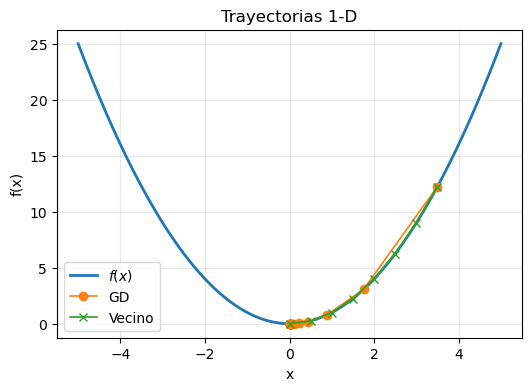

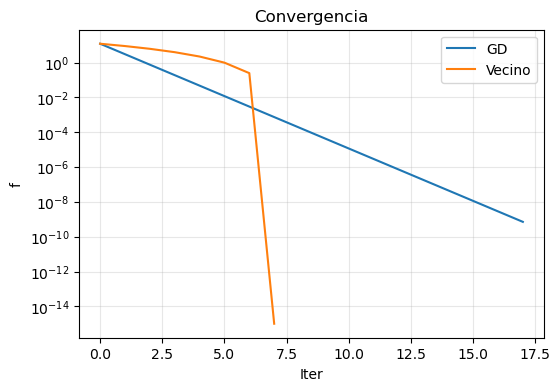

In [5]:
def f_1d(x):        # ejemplo función cuadrática 1D
    return x**2      

def grad_1d(x):
    return 2*x      # derivada (gradiente en 1D)

f_vec, g_vec = lift_1d(f_1d, grad_1d)  # ajuste a 1D

x0 = np.array([3.5])                   # punto inicial: vector de dimensión 1

# Aplicación (1) búsqueda local y (2) gradiente
path_ls = busqueda_local(x0, f=f_vec,
                         generador_vecinos = vecindario_lineal )

path_gd = descenso_gradiente(x0, grad=g_vec, alpha=0.25, iters=60)

# Graficar trayectoria
datos = {"GD": path_gd.ravel(), "Vecino": path_ls.ravel()}
plot_1d_paths(f_1d, datos)

# Graficar convergencia (FO vs Iteración)
hist = {"GD": [f_vec(p) for p in path_gd], "Vecino": [f_vec(p) for p in path_ls]}
plot_convergence(hist)


### 2 - Extender a funciones en mayores dimensiones

Cuando consideramos más de una dimensión, es importante tener en cuenta que:

1. Los vecindarios se pueden definir con geometrías o reglas más elaboradas
2. La derivada pasa a ser un gradiente con las derivadas parciales sobre cada dimensión

#### Ejemplo 1: Función cuadrática 
Iniciaremos evaluando nuestros algoritmos de búsqueda para la función:
$$z = x_1^2+x_2^2$$

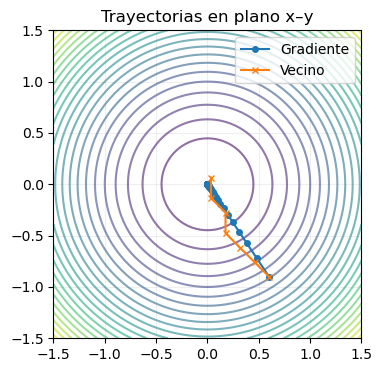

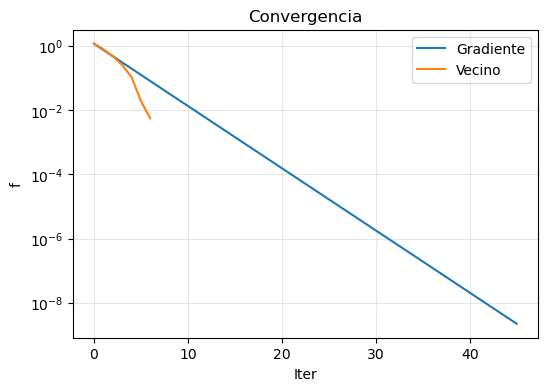

In [6]:
# ---------- Problema parabólico 2D ----------
def f_parab(X):
    return X[0]**2 + X[1]**2
    
def grad_parab(X):
    return np.array([2*X[0], 2*X[1]])

x0 = np.array([0.6, -0.9])
path_gd = descenso_gradiente(x0, grad=grad_parab, alpha=0.1)
path_ls = busqueda_local(x0, f=f_parab,
                         generador_vecinos = vecindario_circular)

# Graficar trayectoria
datos_trayectoria = {"Gradiente": path_gd, "Vecino": path_ls}
plot_2d_contour(f_parab, datos_trayectoria, span=((-1.5,1.5), (-1.5,1.5)))

# Graficar convergencia
datos_FO = {"Gradiente": [f_parab(p) for p in path_gd],
            "Vecino": [f_parab(p) for p in path_ls]}
plot_convergence(datos_FO)

##### Explora:
Intenta de nuevo ajustando parámetros de ambas búsquedas. Tanto la distancia en la creación de vecindarios, como el tamaño del paso en el descenso de gradiente, afectan el proceso de búsqueda del óptimo. 

#### Ejemplo 2: Función con múltiples picos y valles

Usaremos la función:

$$ f(x,y)=\frac{\sin(3x)\,\sin(4y)}{x^{2}+y^{2}+1} $$

como un ejemplo de una posible función compleja, cuyo mínimo global desearíamos encontrar. Construiremos funciones generales para la búsqueda con **vecindario** y con **gradiente**, y veremos su comportamiento para este ejemplo.

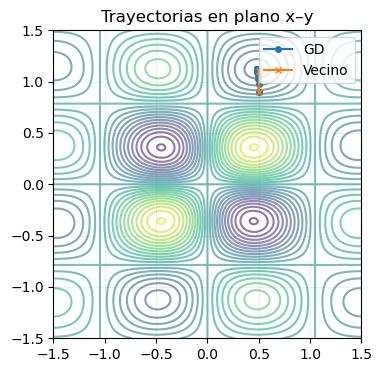

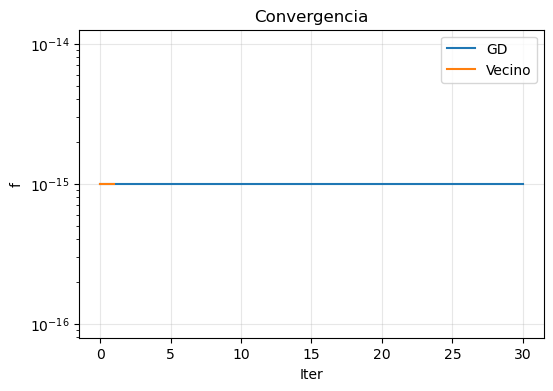

In [7]:
def f_2d(X):
    x, y = X
    return np.sin(3*x)*np.sin(4*y) / (x**2 + y**2 + 1)

def grad_2d(X):
    x, y = X    
    denom = (x**2 + y**2 + 1)
    fx = (3*np.cos(3*x)*np.sin(4*y)*denom - np.sin(3*x)*np.sin(4*y)*(2*x)) / (denom**2)
    fy = (4*np.sin(3*x)*np.cos(4*y)*denom - np.sin(3*x)*np.sin(4*y)*(2*y)) / (denom**2)
    return np.array([fx, fy], dtype=float)

x0 = np.array([0.5, 0.9])
path_gd = descenso_gradiente(x0, grad=grad_2d)
path_ls = busqueda_local(x0, f=f_2d,
                         generador_vecinos=vecindario_circular)

datos_path = {"GD": path_gd, "Vecino": path_ls}
plot_2d_contour(f_2d, datos_path, span=((-1.5,1.5), (-1.5,1.5)))

datos_FO = {"GD": [f_2d(p) for p in path_gd],
            "Vecino": [f_2d(p) for p in path_ls]}
plot_convergence(datos_FO)

##### Explora:
Intenta de nuevo ajustando parámetros de ambas búsquedas. Tanto la distancia en la creación de vecindarios, como el tamaño del paso en el descenso de gradiente, afectan el proceso de búsqueda del óptimo. 